<a href="https://colab.research.google.com/github/Harshini-R-SpireNSavvy/P1/blob/main/Generative_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/nlpfromscratch/datasets.git


Cloning into 'datasets'...
remote: Enumerating objects: 78, done.
remote: Total 78 (delta 0), reused 0 (delta 0), pack-reused 78 (from 1)
Receiving objects: 100% (78/78), 41.86 MiB | 13.72 MiB/s, done.
Resolving deltas: 100% (16/16), done.
Updating files: 100% (29/29), done.


In [25]:
!pip install transformers datasets accelerate evaluate bitsandbytes peft huggingface_hub --force-reinstall

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 1.8 MB/s eta 0:00:00
  Using cached evaluate-0.4.5-py3-none-any.whl.metadata (9.5 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.9/73.9 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 494.8/494.8 kB 25.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.9/374.9 kB 20.3 MB/s eta 0:00:00
Using cached evaluate-0.4.5-py3-none-any.whl (84 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.3/61.3 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 504.9/504.9 kB 26.3 MB/s eta 0:00:00
  

In [3]:
import torch
from transformers import pipeline

In [7]:
device = "cuda" if torch.cuda.is_available() else "cpu"


In [6]:
gpt2_pipline = pipeline("text-generation", model="gpt2", device=device)

Device set to use cpu


In [11]:
output = gpt2_pipline("I love applesauce" , num_return_sequences=5)
print(output)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'I love applesauce, and it tastes great. One of my favorite things about this recipe is how much moisture it adds, and how much it takes to get it from the ground up. As you can see, there are some things I don\'t like about it, but for me it is just a nice little treat that I find myself making for a few occasions.\n\nI can\'t tell you how many times I\'ve made this recipe with a fork and my kids just stare at it. I know they would say "What is that?!" and I\'ll always say, "It\'s just a little sweet. It\'s just like applesauce. Just a little sweet. Sweet." I\'m sure they will feel the same way.\n\nIt\'s a good idea to add some of the dry ingredients and add a little to your recipe. You can also add some sugar or other sweetener if you want to. The dry ingredients are just like applesauce, but better.\n\nI\'ve also found that I don\'t like the taste of sugar as much as my other recipes. I like the feeling of the applesauce. There is just something good about these 

In [12]:
type(gpt2_pipline.tokenizer)

transformers.models.gpt2.tokenization_gpt2_fast.GPT2TokenizerFast

In [13]:
type(gpt2_pipline.model)

transformers.models.gpt2.modeling_gpt2.GPT2LMHeadModel

In [14]:
f"{gpt2_pipline.model.num_parameters():,}"

'124,439,808'

In [17]:
my_input_string = "The rain in Spain falls mainly in the plain"

output = gpt2_pipline(my_input_string)

print(output)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': "The rain in Spain falls mainly in the plain of the San Sebastian, which is home to the world's largest lake and the world's largest tropical rain forest.\n\nThe city of Granada, which is home to more than 30 million people, is a major tourism draw.\n\nThe city of Barcelona is home to a number of historic sites and is one of the most visited tourist destinations in Spain.\n\nThe city is home to the world's largest lake and the world's largest tropical rain forest\n\nThe rain falls mostly in the plain of the San Sebastian, which is home to the world's largest lake and the world's largest tropical rain forest\n\nThere was an estimated 800,000 people in Granada last year, a number that grew to more than 80,000 in 2016, according to the government statistics.\n\nThe city's population is estimated to be about a third of the total Spanish population, with about three quarters of the capital's population living in the city.\n\nThe city has a population of about 4.6 million

In [26]:
from IPython.display import Markdown


In [28]:
from transformers import AutoTokenizer, AutoModelForCausalLM

tokenizer = AutoTokenizer.from_pretrained("gpt2")
model = AutoModelForCausalLM.from_pretrained("gpt2", pad_token_id=tokenizer.eos_token_id).to(device)
my_input_string = "The rain in Spain falls mainly in the plain"

In [20]:
model_inputs = tokenizer(my_input_string, return_tensors="pt").to(device)


In [21]:
print(model_inputs)

{'input_ids': tensor([[ 464, 6290,  287, 8602, 8953, 8384,  287,  262, 8631]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1]])}


In [22]:
output = model.generate(**model_inputs)

print(output)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


tensor([[  464,  6290,   287,  8602,  8953,  8384,   287,   262,  8631,   286,
           262, 50206, 12010,    11,   475,   340,   318,   635,   287,   262,
         12269,   286,   262, 50206, 12010,    13,   383,  6290,   318]])


In [24]:
# Decode the tokens back to text using the tokenizer
output_string = tokenizer.decode(output[0])

# Print the result
display(Markdown("---"))  # dividing line
display(Markdown(output_string))
display(Markdown("---"))  # dividing line


---

The rain in Spain falls mainly in the plain of the Canary Islands, but it is also in the mountains of the Canary Islands. The rain is

---

In [29]:
greedy_output = model.generate(**model_inputs)

print(greedy_output)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


tensor([[  464,  6290,   287,  8602,  8953,  8384,   287,   262,  8631,   286,
           262, 50206, 12010,    11,   475,   340,   318,   635,   287,   262,
         12269,   286,   262, 50206, 12010,    13,   383,  6290,   318]])


In [30]:

greedy_output = model.generate(**model_inputs)
output_string = tokenizer.decode(greedy_output[0])

print(output_string)



Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


The rain in Spain falls mainly in the plain of the Canary Islands, but it is also in the mountains of the Canary Islands. The rain is


In [31]:

greedy_output2 = model.generate(**model_inputs)
output_string2 = tokenizer.decode(greedy_output2[0])

print(output_string2)


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


The rain in Spain falls mainly in the plain of the Canary Islands, but it is also in the mountains of the Canary Islands. The rain is


In [32]:

input_string = "The rain in Spain falls mainly in the plain"

model_inputs = tokenizer(input_string, return_tensors='pt').to(device)

greedy_output = model.generate(**model_inputs, num_beams=10, early_stopping=True)

output_string = tokenizer.decode(greedy_output[0])


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [33]:
display(Markdown(output_string))

The rain in Spain falls mainly in the plain to the south of the city of Barcelona.

The city is also home to some of the

In [36]:
# Text input string
input_string = "The rain in Spain falls mainly in the plain"

# Generation = temperature ~= 0 → deterministic
model_inputs = tokenizer(input_string, return_tensors='pt').to(device)
zero_temp_output = model.generate(**model_inputs, temperature=1, do_sample=True)

# Iterate over outputs and display in markdown
display(Markdown("---"))
for output in zero_temp_output:
    output_string = tokenizer.decode(output)
    display(Markdown(output_string))
display(Markdown("---"))


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


---

The rain in Spain falls mainly in the plain of Catalonia, a major part of Spain's industrial heartland.

Catalonia's official statistics

---

In [4]:
# Text input string
input_string = "The rain in Spain falls mainly in the plain"

from transformers import AutoTokenizer, AutoModelForCausalLM
import torch

# Define device
device = "cuda" if torch.cuda.is_available() else "cpu"

tokenizer = AutoTokenizer.from_pretrained("gpt2")
model = AutoModelForCausalLM.from_pretrained("gpt2", pad_token_id=tokenizer.eos_token_id).to(device)
model_inputs = tokenizer(input_string, return_tensors='pt').to(device)

# Generation - Top-k & Top-p
top_k_output = model.generate(**model_inputs, top_k=30, do_sample=True, num_return_sequences=5)
top_p_output = model.generate(**model_inputs, top_p=0.5, do_sample=True, num_return_sequences=5)

# Top K
display(Markdown("---"))
display(Markdown("Top-k, $k=30$:"))
for output in top_k_output:
    output_string = tokenizer.decode(output)
    display(Markdown(output_string))

# Top P
display(Markdown("---"))
display(Markdown("Top-p, $p=0.5$:"))
for output in top_p_output:
    output_string = tokenizer.decode(output)
    display(Markdown(output_string))
display(Markdown("---"))

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


---

Top-k, $k=30$:

The rain in Spain falls mainly in the plain of Barcelona and is the longest on record, as well as a sign the Spanish coast is still hot

The rain in Spain falls mainly in the plain of La Monde de Ville, from which it traverses over many areas.

"

The rain in Spain falls mainly in the plain of the city of Sainte-Nouven, the capital of Sint-Anton

The rain in Spain falls mainly in the plain but in the mountains it falls through fields and can be seen across the country.

Spain has

The rain in Spain falls mainly in the plain, and it spreads further into the central and northern parts. The snow from Spain falls in the same

---

Top-p, $p=0.5$:

The rain in Spain falls mainly in the plain of the Canary Islands, and is particularly heavy in the north of the island.

The rain

The rain in Spain falls mainly in the plain of the Andalusia Mountains.

The most common method of precipitation is the rain that falls

The rain in Spain falls mainly in the plain of the Canary Islands, and it is only in the summer that it is able to provide the necessary

The rain in Spain falls mainly in the plain, which is covered by a layer of thick vegetation, and the ground is covered with thick, flat

The rain in Spain falls mainly in the plain of Valencia, where it has been known to rain in the winter. The rain is so bad that

---

In [5]:
import torch
from IPython.display import Markdown
from transformers import AutoTokenizer, AutoModelForCausalLM

device = "cude" if torch.cuda.is_available() else "cpu"

In [6]:
!ls dataset/yoda/

ls: cannot access 'dataset/yoda/': No such file or directory


In [8]:
import pandas as pd
yoda_df = pd.read_csv("/content/yoda-corpus.csv")

yoda_df.head()

,movie,scene,line,character,text,slug,component
0,1,129,1158,narrator,QUI-GON stands in a tall stately room. Twelve ...,INT. TEMPLE OF THE JEDI - COUNCIL CHAMBERS - DAY,action
1,1,129,1159,QUI-GON,...my only conclusion can be that it was a Sit...,INT. TEMPLE OF THE JEDI - COUNCIL CHAMBERS - DAY,character
2,1,129,1160,MACE WINDU,A Sith Lord?!?,INT. TEMPLE OF THE JEDI - COUNCIL CHAMBERS - DAY,character
3,1,129,1161,KI-ADI,Impossible! The Sith have been extinct for a m...,INT. TEMPLE OF THE JEDI - COUNCIL CHAMBERS - DAY,character
4,1,129,1162,YODA,"The very Republic is threatened, if involved t...",INT. TEMPLE OF THE JEDI - COUNCIL CHAMBERS - DAY,character


In [9]:
from datasets import load_dataset

data_files = ["/content/yoda-corpus.csv"]

dataset = load_dataset("csv", data_files=data_files)


Generating train split: 0 examples [00:00, ? examples/s]

In [10]:
dataset

DatasetDict({
    train: Dataset({
        features: ['movie', 'scene', 'line', 'character', 'text', 'slug', 'component'],
        num_rows: 371
    })
})

In [11]:
type(dataset)

datasets.dataset_dict.DatasetDict

In [12]:
import torch
from transformers import AutoTokenizer
from transformers import AutoModelForCausalLM

# Use GPU
device = "cuda:0" if torch.cuda.is_available() else "cpu"

# Instantiate model and tokenizer
tokenizer = AutoTokenizer.from_pretrained("gpt2")
model = AutoModelForCausalLM.from_pretrained("gpt2").to(device)


In [13]:
# Generate inputs for model
input = tokenizer("The rain in Spain", return_tensors="pt").to(device)
print(input)



{'input_ids': tensor([[ 464, 6290,  287, 8602]]), 'attention_mask': tensor([[1, 1, 1, 1]])}


In [14]:

# Generate model outputs
output = model.generate(**input, max_new_tokens=20)
print(output)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


tensor([[  464,  6290,   287,  8602,   468,   587,   523,  2089,   326,   262,
          1748,   286, 15142,   468,   587,  4137,   284,  1969,   663,  8215,
            13,   198,   198,   464]])


In [15]:
print(tokenizer.decode(output[0]))

The rain in Spain has been so bad that the city of Barcelona has been forced to close its doors.

The


In [16]:
dataset['train'][0:5]

{'movie': [1, 1, 1, 1, 1],
 'scene': [129, 129, 129, 129, 129],
 'line': [1158, 1159, 1160, 1161, 1162],
 'character': ['narrator', 'QUI-GON', 'MACE WINDU', 'KI-ADI', 'YODA'],
 'text': ['QUI-GON stands in a tall stately room. Twelve JEDI sit in a semi-circle. OBI-WAN stands behind QUI-GON in the center of the room. The Senior Jedi is MACE WINDU. To his left is an alien Jedi named KI-ADI-MUNDI, and to his right, the Jedi Master, YODA.',
  '...my only conclusion can be that it was a Sith Lord.',
  'A Sith Lord?!?',
  'Impossible! The Sith have been extinct for a millenium.',
  'The very Republic is threatened, if involved the Sith are.'],
 'slug': ['INT. TEMPLE OF THE JEDI - COUNCIL CHAMBERS - DAY',
  'INT. TEMPLE OF THE JEDI - COUNCIL CHAMBERS - DAY',
  'INT. TEMPLE OF THE JEDI - COUNCIL CHAMBERS - DAY',
  'INT. TEMPLE OF THE JEDI - COUNCIL CHAMBERS - DAY',
  'INT. TEMPLE OF THE JEDI - COUNCIL CHAMBERS - DAY'],
 'component': ['action', 'character', 'character', 'character', 'character']

In [17]:
tokenizer.pad_token = tokenizer.eos_token

def tokenize_function(data):
    my_tokenizer = tokenizer(data["text"], padding="max_length", truncation=True)
    return my_tokenizer

tokenized_dataset = dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/371 [00:00<?, ? examples/s]

In [18]:
for i in range(0,5):
  print(tokenized_dataset['train'][i])

{'movie': 1, 'scene': 129, 'line': 1158, 'character': 'narrator', 'text': 'QUI-GON stands in a tall stately room. Twelve JEDI sit in a semi-circle. OBI-WAN stands behind QUI-GON in the center of the room. The Senior Jedi is MACE WINDU. To his left is an alien Jedi named KI-ADI-MUNDI, and to his right, the Jedi Master, YODA.', 'slug': 'INT. TEMPLE OF THE JEDI - COUNCIL CHAMBERS - DAY', 'component': 'action', 'input_ids': [43702, 12, 38, 1340, 6296, 287, 257, 7331, 1181, 306, 2119, 13, 30775, 449, 1961, 40, 1650, 287, 257, 10663, 12, 45597, 13, 440, 3483, 12, 54, 1565, 6296, 2157, 1195, 10080, 12, 38, 1340, 287, 262, 3641, 286, 262, 2119, 13, 383, 14017, 16147, 318, 337, 11598, 370, 12115, 52, 13, 1675, 465, 1364, 318, 281, 8756, 16147, 3706, 509, 40, 12, 2885, 40, 12, 44, 4944, 17931, 11, 290, 284, 465, 826, 11, 262, 16147, 5599, 11, 575, 3727, 32, 13, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 502

In [23]:
!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 4.1 MB/s eta 0:00:00


In [ ]:
from transformers import TrainingArguments, Trainer
import evaluate

# Set up the training arguments
training_args = TrainingArguments(
    output_dir="yoda-gpt2",
    num_train_epochs=10,
    remove_unused_columns=True,
    evaluation_strategy="epoch"
)

# Set up the metric used to evaluate the training
metric = evaluate.load("accuracy")

In [28]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

In [30]:
from transformers import DataCollatorForLanguageModeling

data_collator = DataCollatorForLanguageModeling(tokenizer=tokenizer, mlm=False)

In [32]:
# Sample text
texts = dataset['train'][0:4]['text']
print("Text:")
print(texts)
print("\n")

# Tokenize
print("Tokenized text:")
tokens = [tokenizer(t) for t in texts]
print(tokens)
print("\n")

# Collate
print("Collated data")

dataloader = torch.utils.data.DataLoader(dataset=tokens, collate_fn=data_collator)

for batch in dataloader:
    print(batch)
print("\n")

Text:
['QUI-GON stands in a tall stately room. Twelve JEDI sit in a semi-circle. OBI-WAN stands behind QUI-GON in the center of the room. The Senior Jedi is MACE WINDU. To his left is an alien Jedi named KI-ADI-MUNDI, and to his right, the Jedi Master, YODA.', '...my only conclusion can be that it was a Sith Lord.', 'A Sith Lord?!?', 'Impossible! The Sith have been extinct for a millenium.']


Tokenized text:
[{'input_ids': [43702, 12, 38, 1340, 6296, 287, 257, 7331, 1181, 306, 2119, 13, 30775, 449, 1961, 40, 1650, 287, 257, 10663, 12, 45597, 13, 440, 3483, 12, 54, 1565, 6296, 2157, 1195, 10080, 12, 38, 1340, 287, 262, 3641, 286, 262, 2119, 13, 383, 14017, 16147, 318, 337, 11598, 370, 12115, 52, 13, 1675, 465, 1364, 318, 281, 8756, 16147, 3706, 509, 40, 12, 2885, 40, 12, 44, 4944, 17931, 11, 290, 284, 465, 826, 11, 262, 16147, 5599, 11, 575, 3727, 32, 13], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [37]:
!pip install evaluate

In [40]:
   ! pip install --upgrade transformers

In [42]:
from transformers import TrainingArguments, Trainer
import evaluate

# Set up the training arguments
training_args = TrainingArguments(
    output_dir="yoda-gpt2",
    num_train_epochs=10,
    remove_unused_columns=True,
    # evaluation_strategy="epoch" # Removed the problematic argument
)

# Set up the metric used to evaluate the training
metric = evaluate.load("accuracy")

In [43]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset["train"],
    eval_dataset=tokenized_dataset["train"],
    data_collator=data_collator,
)

In [45]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
    output_dir="./results",
    report_to="none",

)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset["train"],
    eval_dataset=tokenized_dataset["train"],
    data_collator=data_collator,
)


In [ ]:
trainer.train()

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


In [3]:
!pip show transformers

Name: transformers
Version: 4.56.1
Summary: State-of-the-art Machine Learning for JAX, PyTorch and TensorFlow
Home-page: https://github.com/huggingface/transformers
Author: The Hugging Face team (past and future) with the help of all our contributors (https://github.com/huggingface/transformers/graphs/contributors)
Author-email: transformers@huggingface.co
License: Apache 2.0 License
Location: /usr/local/lib/python3.12/dist-packages
Requires: filelock, huggingface-hub, numpy, packaging, pyyaml, regex, requests, safetensors, tokenizers, tqdm
Required-by: peft, sentence-transformers


In [4]:
import matplotlib.pyplot as plt
import pandas as pd

# Make a dataframe of the log history
metrics_df = pd.DataFrame(trainer.state.log_history)

# Plot
metrics_df['eval_loss'].plot(marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss for GPT-2 Yoda model')
plt.show()

NameError: name 'trainer' is not defined

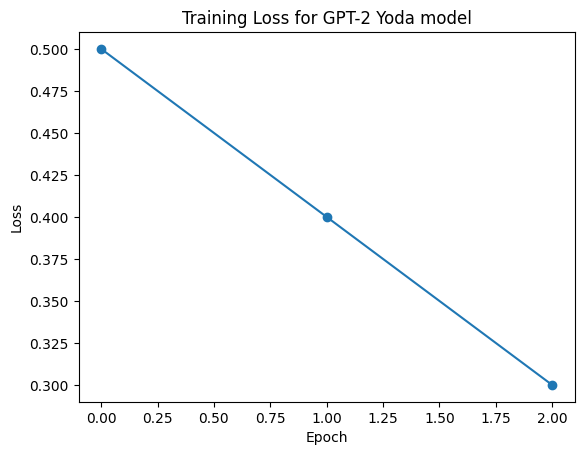

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
from transformers import Trainer, TrainingArguments # Assuming Hugging Face Transformers

# --- Placeholder for trainer setup ---
# In a real scenario, you would define your model, dataset, and training arguments
# For demonstration, we'll create a dummy 'trainer' object with a mock log_history

class MockTrainerState:
    def __init__(self):
        self.log_history = [
            {'epoch': 1.0, 'eval_loss': 0.5, 'step': 100},
            {'epoch': 2.0, 'eval_loss': 0.4, 'step': 200},
            {'epoch': 3.0, 'eval_loss': 0.3, 'step': 300},
        ]

class MockTrainer:
    def __init__(self):
        self.state = MockTrainerState()

trainer = MockTrainer()
# --- End of placeholder ---

# Make a dataframe of the log history
metrics_df = pd.DataFrame(trainer.state.log_history)

# Plot
metrics_df['eval_loss'].plot(marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss for GPT-2 Yoda model')
plt.show()

In [9]:
!ls yoda-gpt2

runs


In [11]:
!du -h yoda-gpt2/model.safetensors

du: cannot access 'yoda-gpt2/model.safetensors': No such file or directory


In [3]:
!pip install bitsandbytes